## PowerSpec diags

- An example how to use PowerSpec (from AJ) to compute and plot a space power spectrum from MEDWEST60 ensemble simulations 
(on SSH)
- What it does: 
    * spectrum at several timesteps averaged over 19 members (2-20)
    * spectrum of the difference of members with mb #1 at several timesteps averaged over members 2-19.
    * plot and save psd data

- Left to do:
    * average also over a few timesteps: like 24 or 48 hrs around date or so.

# Load packages

In [1]:
## standart libraries
import os,sys
import numpy as np

from scipy.signal import argrelmax
from scipy.stats import linregress

# xarray
import xarray as xr

# plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# custom tools
import lib_medwest60 as slx

%matplotlib inline 

In [2]:
# Adekunle's PowerSPec module: https://github.com/adeajayi-kunle/PowerSpec
import sys
sys.path.insert(0,'/linkhome/rech/genige01/regi915/PYGIT/powerspec/powerspec')
import powerspec as ps
#import Plot_PowerSpec as pp

In [3]:
diro='/gpfsstore/rech/egi/regi915/MEDWEST60/DIAGS/jun30/'

## Read data (ensemble experiments)

In [4]:
varna="sossheig"
typ="gridT-2D"
naexpNO="STO5%"
CONFIGCASENO='MEDWEST60-GSL15'
CONFIGCASE=CONFIGCASENO
ensNO='ens01'
exp=ensNO
machine='JZ'
NMBtot=20
nav_lat_ref,nav_lon_ref,maskNO,sshNO,varnameNO,latexvarnameNO=slx.readallmbs(machine=machine,NMBtot=NMBtot,typ=typ,varna=varna,CONFIGCASEmed=CONFIGCASENO,ens=ensNO)
sshNO.attrs['experiment_short_name'] =  naexpNO
maskmap = maskNO.isel(z=0).squeeze()
maskref=maskmap

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
001MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
002MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
003MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
004MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
005MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
006MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
007MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
008MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
009MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
010MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
011MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
012MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
013MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
014MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
015MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
016MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
017MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
018MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
019MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
020MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

In [5]:
sshNO

,Array,Chunk
Bytes,40.84 GB,68.07 MB
Shape,"(20, 720, 803, 883)","(1, 24, 803, 883)"
Count,8670 Tasks,600 Chunks
Type,float32,numpy.ndarray


In [34]:
# pour GSL03 and GSL16
ssh00 = sshNO.isel(time_counter=slice(24*10,960))

In [6]:
# pour GSL14 et GSL15
ssh00 = sshNO

## Define 4 regions of 200x200 gridpoints
See maps below

In [7]:
#region=[400,600,210,410]
Lregion=[454,804,176,526]

region1=[400,600,210,410]

region2=[600,800,410,610]

region3=[600,800,180,380]

## Plot SSH map at day +30 and plot regions.

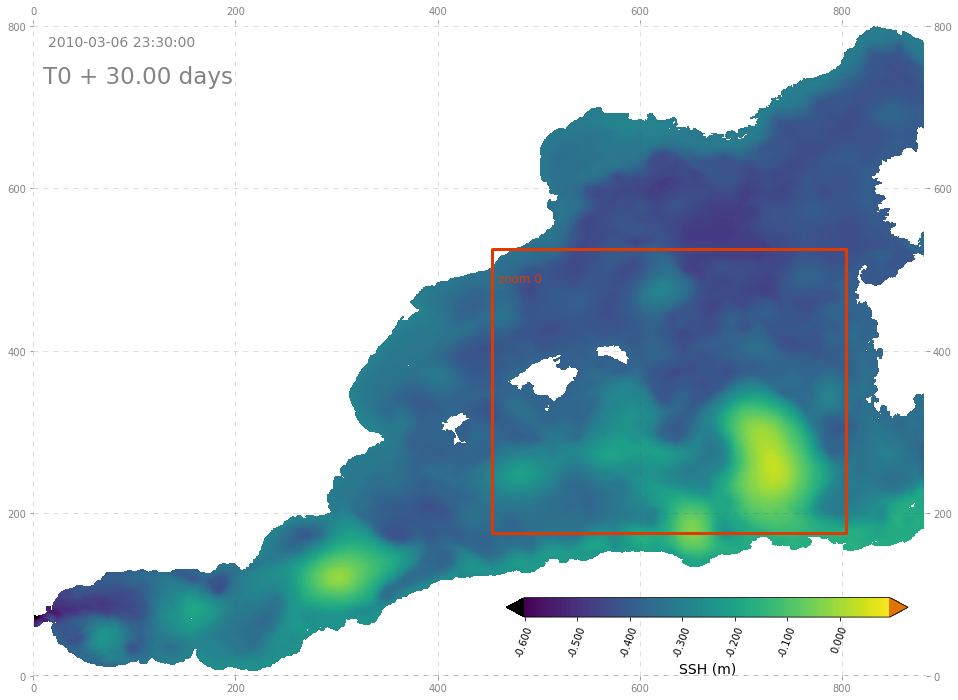

In [8]:
ens=ensNO
gstyle='lightstyle'
varname='SSH'
latexvarname=slx.flatexvarname(varna)[1]
plto = varname+"_"+CONFIGCASE+"-"+ens+"ssh"    


#### for it in range(0,SSH_el.time_counter.size-1):
#for it in range(10,11,6):
for it in range(719,720,6):  
#for it in range(100,359,6): 
    #====================================
    # data to plot 
    tdate=ssh00.time_counter.to_index()[it]
    iday = (it+1)/24.
    tdelta="T0 + "+str('%.2f'%(iday))+" days"
    tformat="%.3f"
    
    # multiplicating factor
    fac=1

    if fac==1e3:
        faclabel='1e3'
        faclabelinv='10$^{-3}$'

    if fac==1:
        faclabel='1'
        faclabelinv=''

    if fac==1e2:
        faclabel='1e2'
        faclabelinv='10$^{-2}$'
        
    data2plot = ssh00.isel(e=0,time_counter=it).squeeze().where(maskmap>0).to_masked_array()
    data2plot = data2plot*fac                 
    
    
    namo = plto+'_'+str(it)+'.png'


    #========= Plot settings ===============
    levbounds=[-0.6,0.1,0.005]
    
    # customed colormap
    cmap,norm = slx.mycolormap(levbounds,cm_base='viridis',cu='k',co='#DF7401')
    #cmocean.cm.thermal_r


    #========= PLOT ===============
    fig3,(ax) = plt.subplots(1, 1, figsize=[16, 12],facecolor='w')

    # main plot
    cs,ax = slx.plotmapMEDWEST_gp(fig3,ax,data2plot,cmap,norm,plto=plto,gridpts=True,gridptsgrid=True,gstyle=gstyle)
    #cs2   = ax.pcolormesh(data2plot2,cmap=cmap2,norm=norm2)
    lalpha=0.2
    lwidthgrid=1.
    gridinc=200
    lstylegrid=(0, (5, 5))
    if (gstyle=='lightstyle'):
            cmap.set_bad('w')
            lcolorgrid="#585858" # "#D8D8D8"
            tcolorgrid="#848484"#"#848484"            

    #ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(gridinc))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(gridinc))   
    ax.tick_params(axis='x', colors=tcolorgrid)
    ax.tick_params(axis='y', colors=tcolorgrid)
    ax.grid(which='major',linestyle=lstylegrid,color=lcolorgrid,alpha=lalpha,linewidth=lwidthgrid)
    ax.axhline(y=1.,xmin=0, xmax=883,zorder=10,color=lcolorgrid,linewidth=lwidthgrid,linestyle=lstylegrid,alpha=lalpha )
    
    # add date
    tcolordate="#848484"
    tsizedate=14
    
    ax.annotate(tdate,xy=(15,775),xycoords='data', color=tcolordate,size=tsizedate)
    plt.axhline(y=350.,xmin=200, xmax=400,zorder=10,color='r',linewidth=3,linestyle='-',alpha=1 )
    #plt.annotate(tdelta,xy=(15,750),xycoords='data', color=tcolordate,size=tsizedate)
    plt.annotate(tdelta,xy=(10,730),xycoords='data', color=tcolordate,size=23)
       
    
    # add colorbar
    cbon=True
    if cbon:
        tlabel=latexvarname+slx.textunitfac(varname,faclabelinv)
        cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=20,tformat="%.3f",
                             tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                            bbta=(0.08, -0.08,0.9,0.2))
    
    showzoomL=True
    if showzoomL:
        region=Lregion
        xbox=[region[0],region[0],region[1],region[1],region[0]]
        ybox=[region[2],region[3],region[3],region[2],region[2]]
        ax.plot(xbox, ybox, color="#DF3A01", alpha=1,linewidth=3, linestyle="-",solid_capstyle='round', zorder=2)
        ax.annotate("zoom 0",xy=(460,485),xycoords='data', color="#DF3A01",size=12)

    showzoom3=False
    if showzoom3:
        region=region3
        xbox=[region[0],region[0],region[1],region[1],region[0]]
        ybox=[region[2],region[3],region[3],region[2],region[2]]
        ax.plot(xbox, ybox, color='w', alpha=0.9,linewidth=1, linestyle=":",solid_capstyle='round', zorder=2)
        ax.annotate("zoom 3",xy=(605,190),xycoords='data', color="w",size=10)

    showzoom2=False
    if showzoom2:
        region=region2
        xbox=[region[0],region[0],region[1],region[1],region[0]]
        ybox=[region[2],region[3],region[3],region[2],region[2]]
        ax.plot(xbox, ybox, color='w', alpha=0.9,linewidth=1, linestyle=":",solid_capstyle='round', zorder=2)
        ax.annotate("zoom 2",xy=(605,415),xycoords='data', color="w",size=10)

    showzoom1=False
    if showzoom1:
        region=region1
        xbox=[region[0],region[0],region[1],region[1],region[0]]
        ybox=[region[2],region[3],region[3],region[2],region[2]]
        ax.plot(xbox, ybox, color='w', alpha=0.9,linewidth=1, linestyle=":",solid_capstyle='round', zorder=2)
        ax.annotate("zoom 1",xy=(405,220),xycoords='data', color="w",size=10)
        
        
    plt.show()
         
    # Save fig in png, resolution dpi    
    slx.saveplt(fig3,diro,namo,dpifig=300)
    plt.close(fig3)

## Compute and plot power spectrum

* Select a (predefined) region

In [9]:
region=Lregion
#region=region2
reg='region0'
nav_lon = nav_lon_ref.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
nav_lat = nav_lat_ref.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
maskreg = maskref.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
sshNOreg = ssh00.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
sshensreg = sshNOreg

In [10]:
sshNOreg

,Array,Chunk
Bytes,7.06 GB,11.76 MB
Shape,"(20, 720, 350, 350)","(1, 24, 350, 350)"
Count,9270 Tasks,600 Chunks
Type,float32,numpy.ndarray


## Spectra using $\Delta$time (in hours) x 20 mbs stacked

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


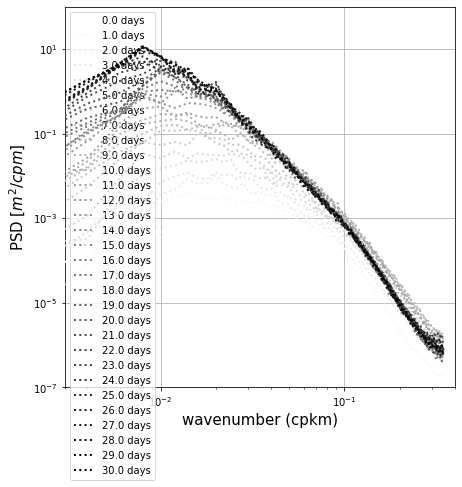

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


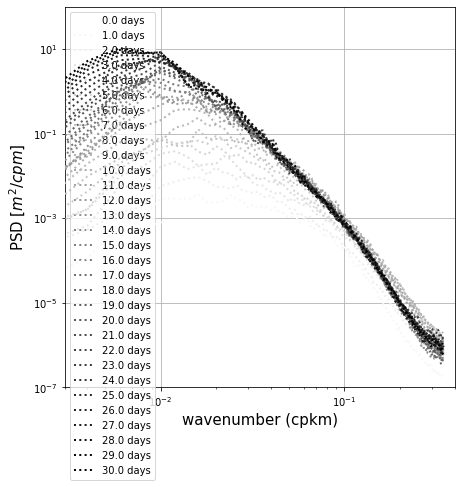

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


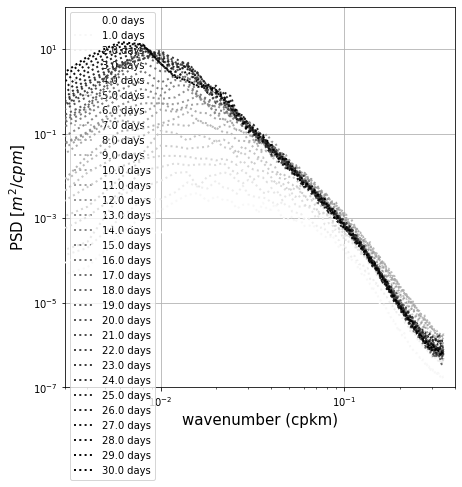

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


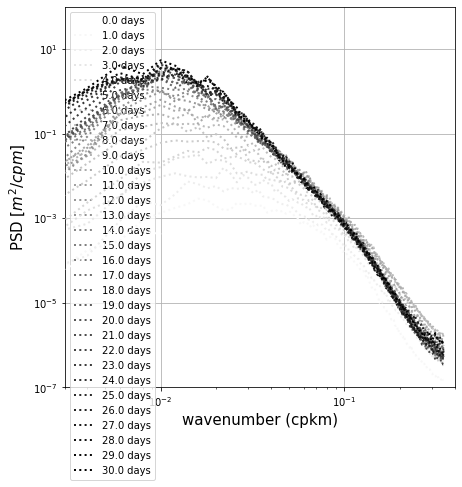

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


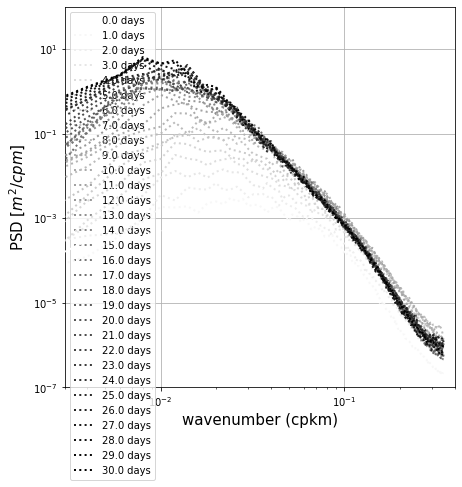

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


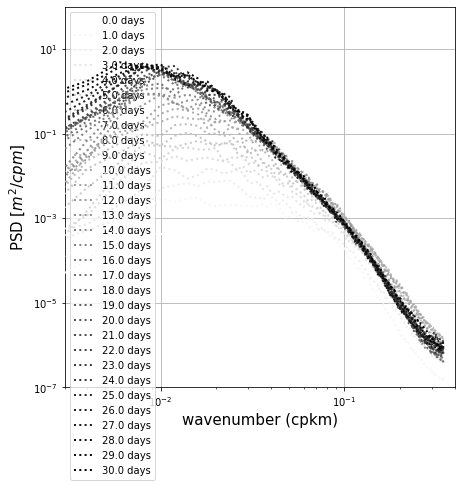

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


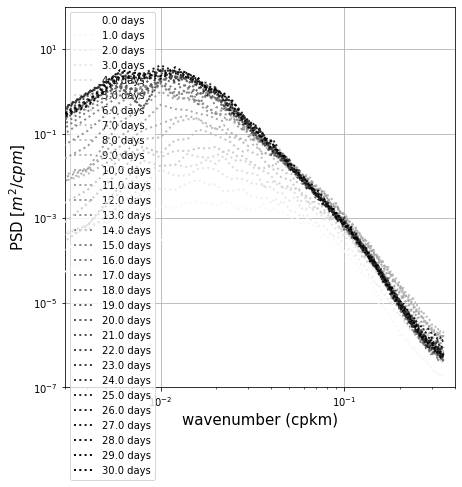

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


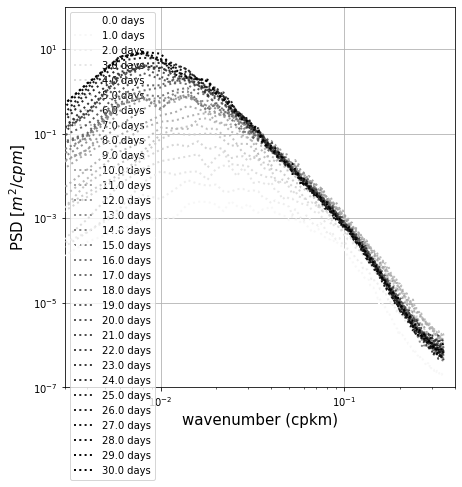

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


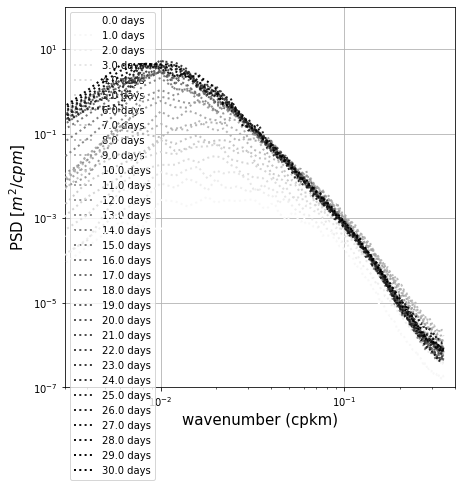

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


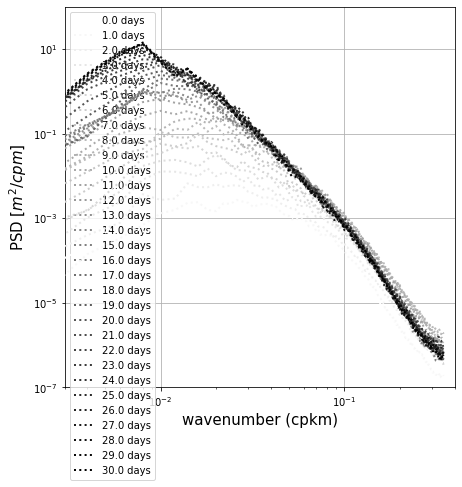

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


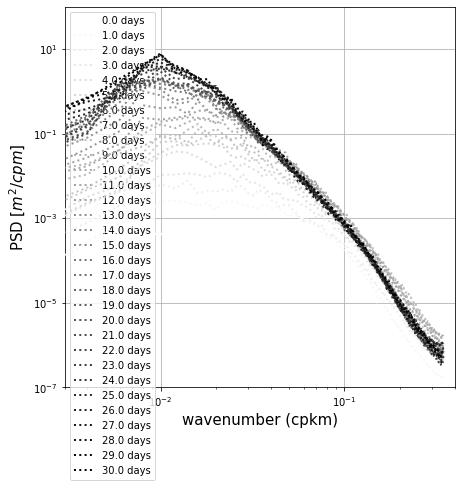

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


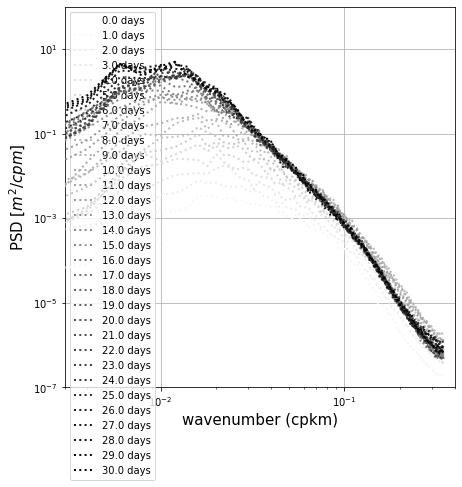

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


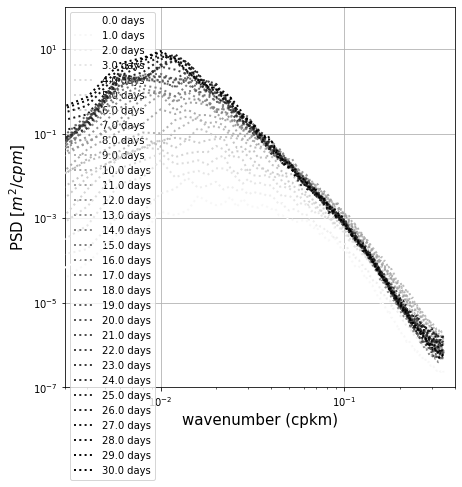

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


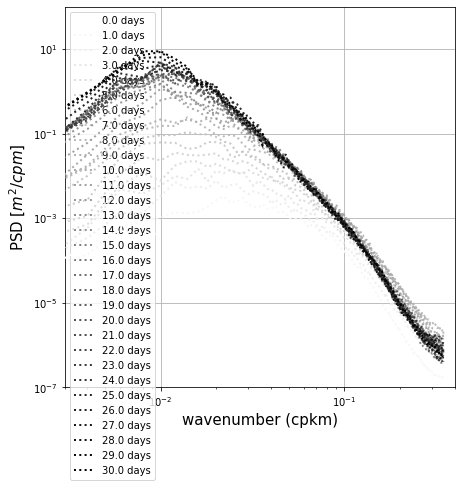

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


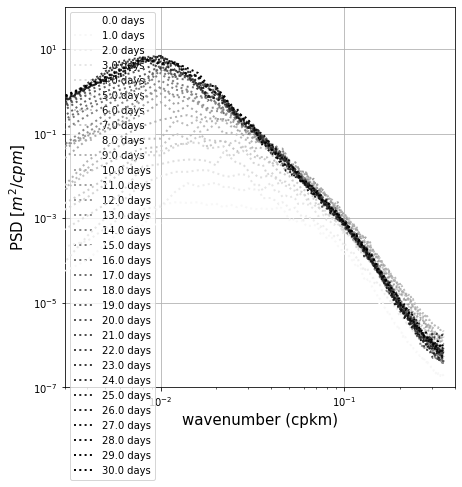

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


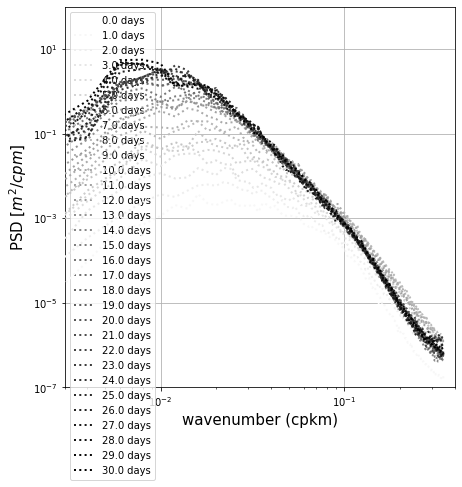

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


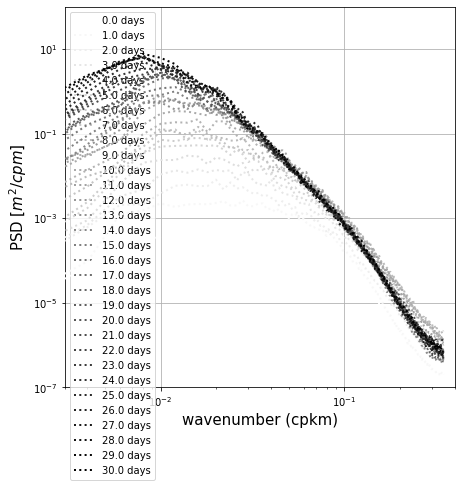

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


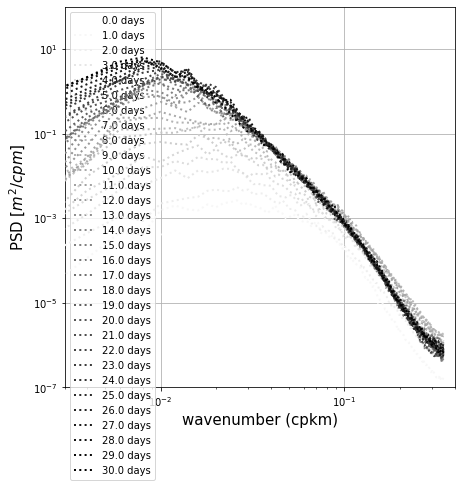

--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719


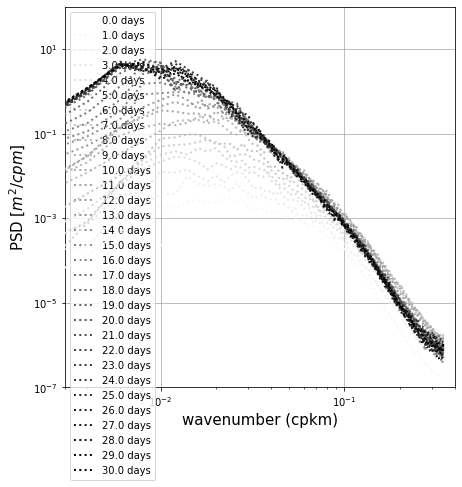

In [13]:
DT=1
dpifig=300
#========= Plot settings ===============
levbounds=[0,6+4,1]

# customed colormap
cmap,norm = slx.mycolormap(levbounds,cm_base='hot_r',cu='k',co='b')
#cmocean.cm.thermal_r

Nmtot=20
allmb=False

if allmb:
    Nmtot=1

for imref in range(16,17):
    for im in range(0,Nmtot):
        
        if (im!=imref):    
            if allmb:
                namo='SP30_DT'+str(DT)+'_allmbs_'+CONFIGCASE+'-'+ens+'_'+reg    
            else:
                namo='SP30DIFF_DT'+str(DT)+'_m'+str(im+1)+'_mbref'+str(imref+1)+'_'+CONFIGCASE+'-'+ens+'_'+reg

            plto='plt'+namo


            icount=-1
            for itt in range(0,721,24*1):
            #for itt in range(0,1441,24*1):
                it =itt-1
                if it<0:
                    it=0
                icount = icount+1
                print('--------'+str(it))
                # - compute daily spectra then computer average

                _psdNO = []

                #sshNO = sshNOreg[it:it+DT,:,:].where(maskreg>0) #.squeeze()            
                sshNO = sshNOreg[:,it:it+DT,:,:].where(maskreg>0) #.squeeze()   

                sshdiff = sshNO.isel(e=im)-sshNO.isel(e=imref)


                kTOT=len(sshdiff)
                for k in range(kTOT):
                      wavenumberNO,psdNO_ = ps.wavenumber_spectra(sshdiff[k].to_masked_array(),nav_lon.values,nav_lat.values) 
                      _psdNO.append(psdNO_)

                psdNO = np.array(_psdNO).mean(axis=0)

                if icount==0:
                    fig3 = plt.figure(figsize=([7,7]),facecolor='white')
                    allpsdNO = xr.DataArray(psdNO,dims=('wn'),name='psd')

                else:
                    xrpsdNO  = xr.DataArray(psdNO,dims=('wn'),name='psd')
                    allpsdNO = xr.concat([allpsdNO,xrpsdNO], dim='time_counter')

                #co=((1440-it)/1441., (1440-it)/1441., (1440-it)/1441.)
                co=((720-it)/721., (720-it)/721., (720-it)/721.)
                coNO=co
                #coNO=cmap.colors[icount+2]
                lw=1
                lwNO=2
                st="-"
                zorder=100

                if icount==100:
                    co='k'
                    lw=1.5
                    st=":"
                    lwNO=3
                    coNO='k'
                    zorder=100

                if icount==106:
                    co='k'
                    lw=2.5
                    coNO='k'
                    lwNO='2.5'

                if (DT>1):
                    label=str((itt+(DT/2.))/24.)+" days"
                else:
                    label=str(itt/24.)+" days"


                plt.loglog(1E3*wavenumberNO,psdNO,color=coNO,linewidth=lwNO,linestyle=':',label=label,zorder=100)

            plt.xlim(3e-3,4e-1)
            plt.ylim(1e-7,1e2)
            plt.xlabel('wavenumber (cpkm)',fontsize=15)
            plt.ylabel('PSD '+r'[$m^2/cpm$]',fontsize=15)
            plt.grid(True)   
            plt.legend()
            plt.show()


            # Save fig in png, resolution dpi    
            slx.saveplt(fig3,diro,plto,dpifig=300)



            savedata=True
            if savedata:
                #namo2='SP30_DT'+str(DT)+'_m'+str(im+1)+'_'+CONFIGCASENO+'-'+ens+'_'+reg
                #dataprint = xr.DataArray(allpsdNO.values, dims=('time_counter', 'wn'),coords={'time_counter':[0,5,10,15,20,25,30]})
                #dataprint = xr.DataArray(allpsd.values, dims=('time_counter', 'wn'),coords={'time_counter':[0,5,10,15,20,25,30,35,40,45,50,55,60]})
                dataprint = xr.DataArray(allpsdNO.values, dims=('time_counter', 'wn'),coords={'time_counter':np.arange(0,31,1)})

                outfi = 'dat'+namo+'.nc'

                dataprint.name = 'psd'
                dataprint.attrs['long_name'] =  "psd"
                dataprint.attrs['mb']=im
                dataprint.attrs['mbref']=imref
                dataprint.to_netcdf(diro+outfi,mode='w')

                xrwavenumber = xr.DataArray(wavenumberNO,dims=('wn'),name='wavenumber')
                xrwavenumber.name = 'wavenumber'
                xrwavenumber.attrs['long_name'] =  "wavenumber cpm"
                xrwavenumber.to_netcdf(diro+outfi,mode='a')



---